In [1]:
# Step 1: Install and import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Step 2: Load the data from Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
import zipfile
import os

# Specify the path to the zip file and extract it
zip_path = '/content/drive/MyDrive/data_w5.zip'  # Replace with your actual path
data = '/content/drive/MyDrive/extracted_data/'  # Folder to extract to

# Unzip the file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_folder)

# Get the list of all extracted files
data = os.listdir(data)  # List all files in the extracted folder

# Print extracted files to check if there's any .csv file
print("Extracted files:", data)


Extracted files: ['data']


In [12]:
import os

# Specify the correct folder path
folder_path = '/content/drive/MyDrive/extracted_data/data'

# List all files in the folder
extracted_files = os.listdir(folder_path)

# Print the list of files in the folder
print("Files in extracted_data/data:", extracted_files)


Files in extracted_data/data: ['Xente_Variable_Definitions.xlsx', 'Xente_Variable_Definitions.csv', 'data.csv', 'data.xlsx']


In [14]:
import pandas as pd

# Specify the correct path to the CSV file
csv_file_path = '/content/drive/MyDrive/extracted_data/data/data.csv'

# Load the CSV data into pandas
data = pd.read_csv(csv_file_path)

# Display the first few rows of the dataset
print(data.head())
print(data.columns)


         TransactionId         BatchId       AccountId       SubscriptionId  \
0  TransactionId_76871   BatchId_36123  AccountId_3957   SubscriptionId_887   
1  TransactionId_73770   BatchId_15642  AccountId_4841  SubscriptionId_3829   
2  TransactionId_26203   BatchId_53941  AccountId_4229   SubscriptionId_222   
3    TransactionId_380  BatchId_102363   AccountId_648  SubscriptionId_2185   
4  TransactionId_28195   BatchId_38780  AccountId_4841  SubscriptionId_3829   

        CustomerId CurrencyCode  CountryCode    ProviderId     ProductId  \
0  CustomerId_4406          UGX          256  ProviderId_6  ProductId_10   
1  CustomerId_4406          UGX          256  ProviderId_4   ProductId_6   
2  CustomerId_4683          UGX          256  ProviderId_6   ProductId_1   
3   CustomerId_988          UGX          256  ProviderId_1  ProductId_21   
4   CustomerId_988          UGX          256  ProviderId_4   ProductId_6   

      ProductCategory    ChannelId   Amount  Value  TransactionStart

In [15]:
# Step 4: Define Credit Risk Proxy based on 'FraudResult'
# Assuming 'FraudResult' column is available, where 1 indicates fraudulent (high risk)
# and 0 indicates not fraudulent (low risk)
data['CreditRisk'] = data['FraudResult'].apply(lambda x: 1 if x == 1 else 0)

# Step 5: Explore the distribution of Credit Risk
print(data['CreditRisk'].value_counts())

# Step 6: Check for missing values
print(data.isnull().sum())  # Check for any missing values in the dataset


CreditRisk
0    95469
1      193
Name: count, dtype: int64
TransactionId           0
BatchId                 0
AccountId               0
SubscriptionId          0
CustomerId              0
CurrencyCode            0
CountryCode             0
ProviderId              0
ProductId               0
ProductCategory         0
ChannelId               0
Amount                  0
Value                   0
TransactionStartTime    0
PricingStrategy         0
FraudResult             0
CreditRisk              0
dtype: int64


In [16]:
# Check for missing values in the entire dataset
missing_values = data.isnull().sum()

# Print missing values for each column
print(missing_values)


TransactionId           0
BatchId                 0
AccountId               0
SubscriptionId          0
CustomerId              0
CurrencyCode            0
CountryCode             0
ProviderId              0
ProductId               0
ProductCategory         0
ChannelId               0
Amount                  0
Value                   0
TransactionStartTime    0
PricingStrategy         0
FraudResult             0
CreditRisk              0
dtype: int64


In [18]:
# Step 7: Analyze correlations with Credit Risk

# Select only numeric columns for correlation calculation
numeric_data = data.select_dtypes(include=['number'])

# Calculate correlation matrix for numeric columns
correlation_matrix = numeric_data.corr()

# Display the correlation of each feature with 'CreditRisk'
correlation_with_risk = correlation_matrix['CreditRisk'].sort_values(ascending=False)
print(correlation_with_risk)


FraudResult        1.000000
CreditRisk         1.000000
Value              0.566739
Amount             0.557370
PricingStrategy   -0.033821
CountryCode             NaN
Name: CreditRisk, dtype: float64


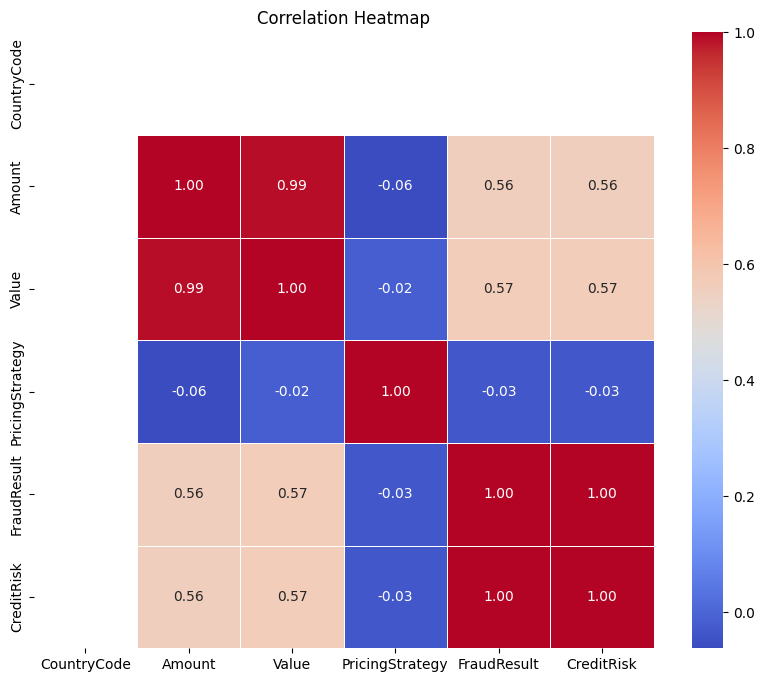

In [19]:
# Step 8: Visualize correlation matrix to get a better understanding of relationships
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


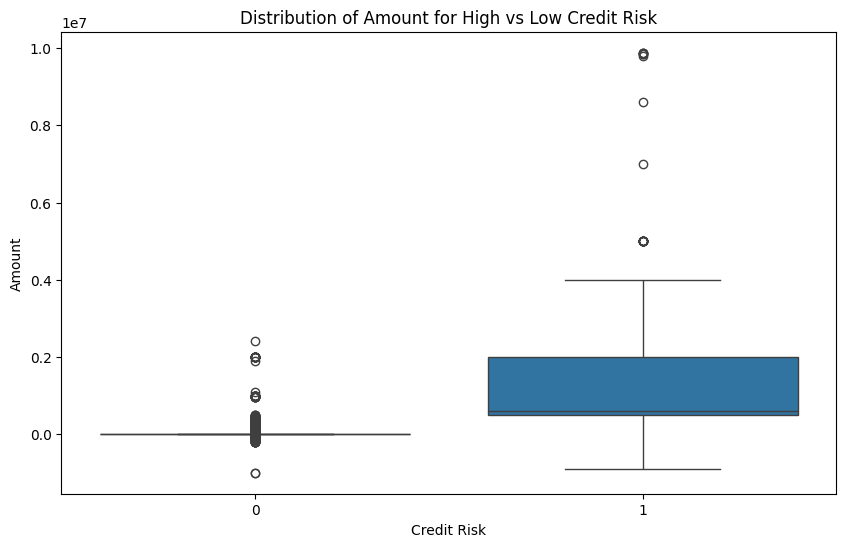

In [20]:
# Step 9: Investigate the relationship between certain features and Credit Risk
# Example: Checking distribution of 'Amount' for high and low-risk customers
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='CreditRisk', y='Amount')
plt.title('Distribution of Amount for High vs Low Credit Risk')
plt.xlabel('Credit Risk')
plt.ylabel('Amount')
plt.show()

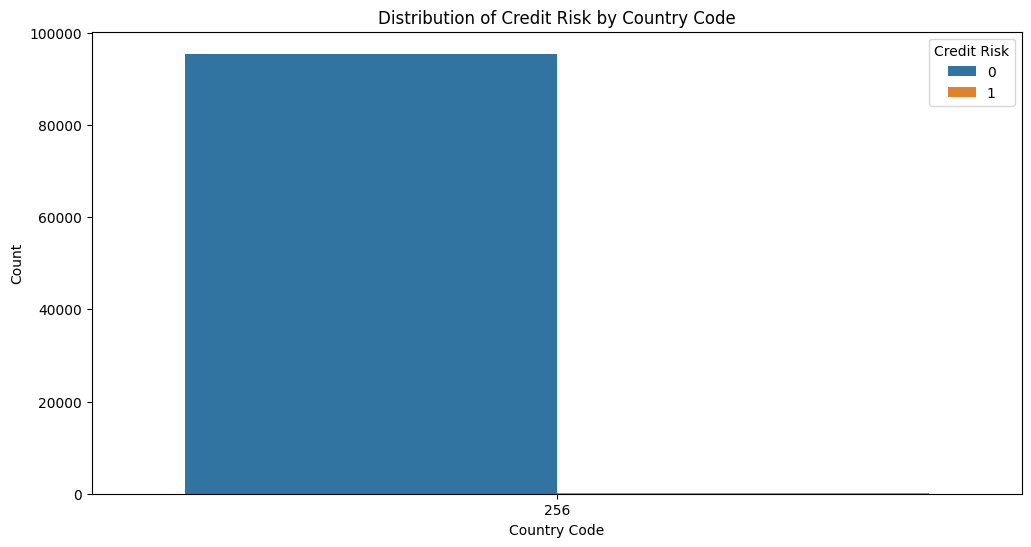

In [21]:
# Example: Checking distribution of 'CountryCode' for high and low-risk customers
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='CountryCode', hue='CreditRisk')
plt.title('Distribution of Credit Risk by Country Code')
plt.xlabel('Country Code')
plt.ylabel('Count')
plt.legend(title='Credit Risk')
plt.show()

In [22]:
# Step 10: Investigate the relationship between Transaction Start Time and Credit Risk
# Assuming 'TransactionStartTime' is in datetime format, converting if necessary
data['TransactionStartTime'] = pd.to_datetime(data['TransactionStartTime'], errors='coerce')

# Create new features based on TransactionStartTime (e.g., hour of the day)
data['HourOfDay'] = data['TransactionStartTime'].dt.hour


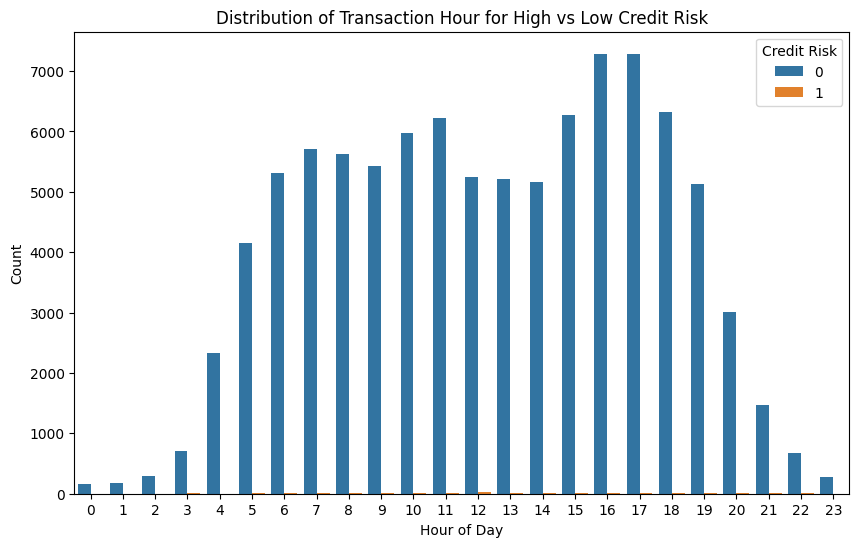

In [23]:
# Example: Checking distribution of 'HourOfDay' for high and low-risk customers
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='HourOfDay', hue='CreditRisk')
plt.title('Distribution of Transaction Hour for High vs Low Credit Risk')
plt.xlabel('Hour of Day')
plt.ylabel('Count')
plt.legend(title='Credit Risk')
plt.show()


# Task 2 - Exploratory Data Analysis (EDA)

In [24]:
# Step 3: Overview of the Data - Check dataset structure, number of rows, columns, and data types
print("Data Shape (Rows, Columns):", data.shape)
print("\nData Types:\n", data.dtypes)

Data Shape (Rows, Columns): (95662, 18)

Data Types:
 TransactionId                        object
BatchId                              object
AccountId                            object
SubscriptionId                       object
CustomerId                           object
CurrencyCode                         object
CountryCode                           int64
ProviderId                           object
ProductId                            object
ProductCategory                      object
ChannelId                            object
Amount                              float64
Value                                 int64
TransactionStartTime    datetime64[ns, UTC]
PricingStrategy                       int64
FraudResult                           int64
CreditRisk                            int64
HourOfDay                             int32
dtype: object


In [25]:
# Step 4: Summary Statistics - Central tendency, dispersion, and shape of the dataset
print("\nSummary Statistics:\n", data.describe())



Summary Statistics:
        CountryCode        Amount         Value  PricingStrategy   FraudResult  \
count      95662.0  9.566200e+04  9.566200e+04     95662.000000  95662.000000   
mean         256.0  6.717846e+03  9.900584e+03         2.255974      0.002018   
std            0.0  1.233068e+05  1.231221e+05         0.732924      0.044872   
min          256.0 -1.000000e+06  2.000000e+00         0.000000      0.000000   
25%          256.0 -5.000000e+01  2.750000e+02         2.000000      0.000000   
50%          256.0  1.000000e+03  1.000000e+03         2.000000      0.000000   
75%          256.0  2.800000e+03  5.000000e+03         2.000000      0.000000   
max          256.0  9.880000e+06  9.880000e+06         4.000000      1.000000   

         CreditRisk     HourOfDay  
count  95662.000000  95662.000000  
mean       0.002018     12.447722  
std        0.044872      4.846964  
min        0.000000      0.000000  
25%        0.000000      8.000000  
50%        0.000000     13.00000

In [26]:
# Step 5: Distribution of Numerical Features - Visualize distributions of all numerical features
numerical_features = data.select_dtypes(include=[np.number]).columns


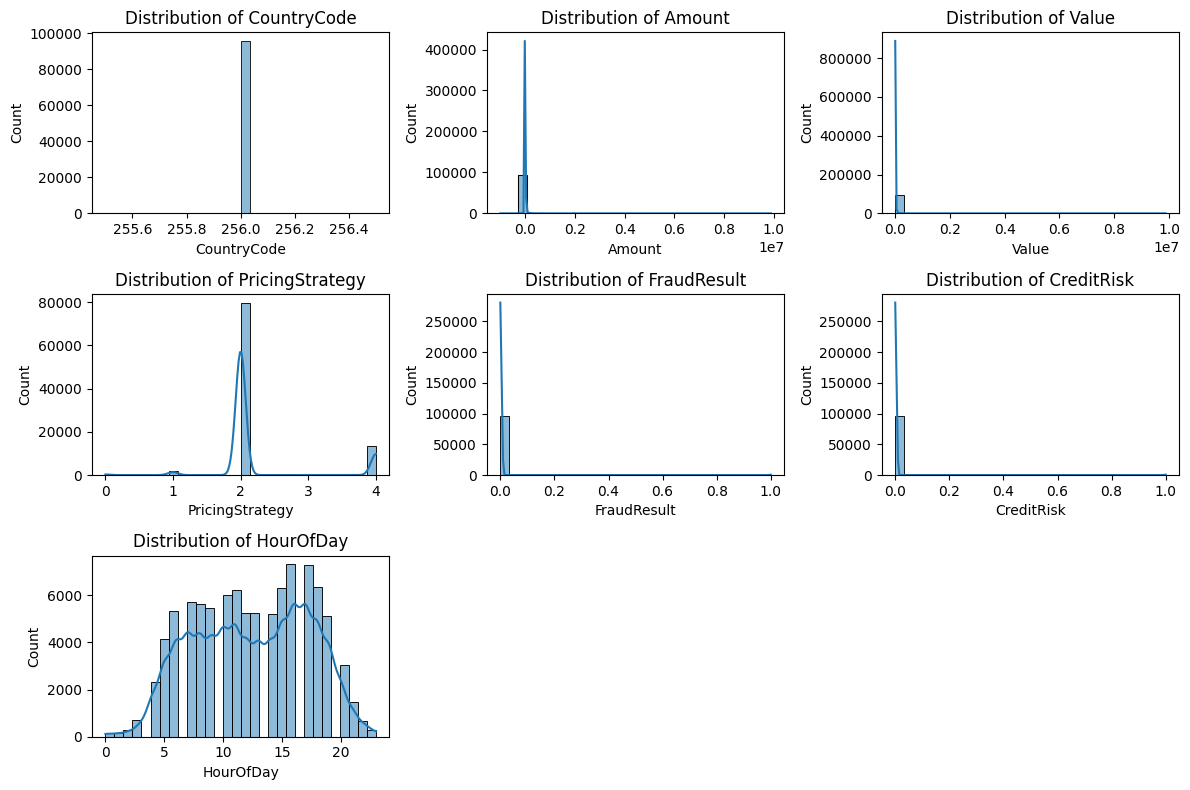

In [28]:
# Plot histograms for each numerical feature
# Adjust the subplot layout to accommodate all features
num_features = len(numerical_features)
num_rows = (num_features + 2) // 3  # Calculate rows needed to fit all features
# +2 ensures enough rows for remainders

plt.figure(figsize=(12, 8))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(num_rows, 3, i)  # Dynamically adjust subplot position
    sns.histplot(data[feature], kde=True, bins=30)
    plt.title(f'Distribution of {feature}')
    plt.tight_layout()

plt.show()

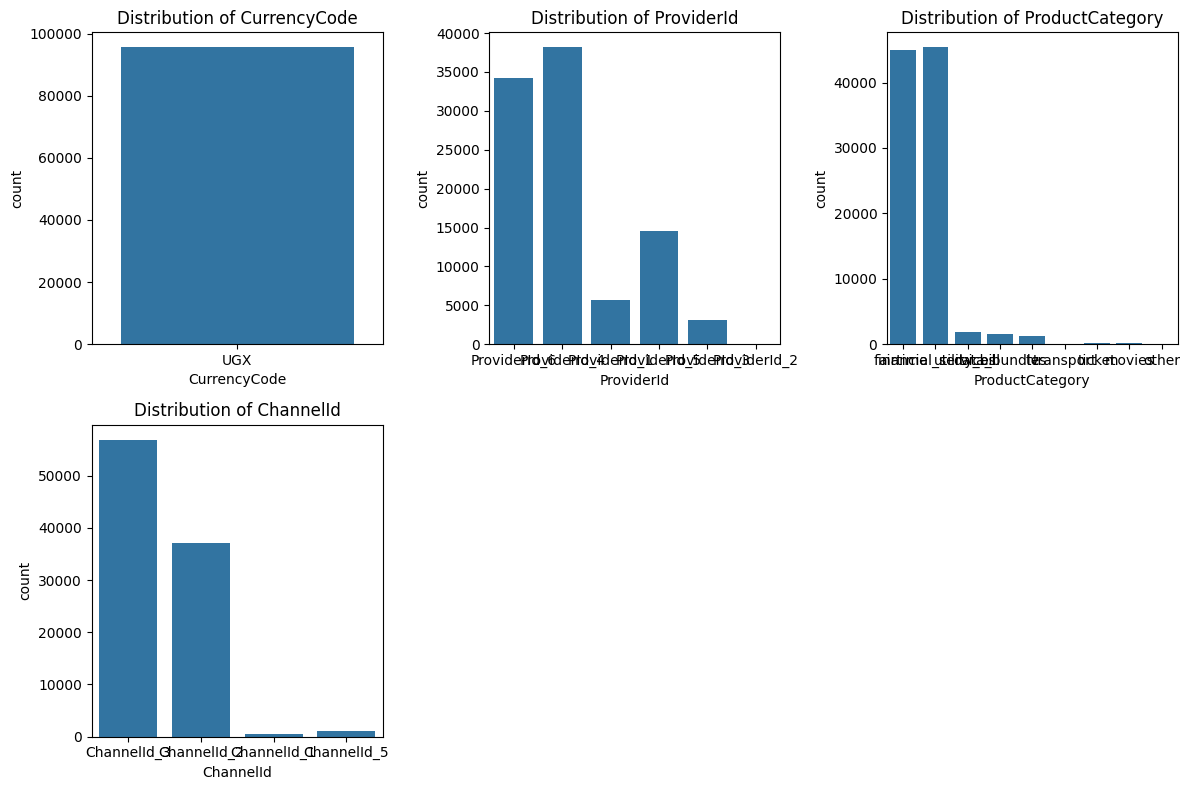

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Load the dataset into the 'data' DataFrame
data = pd.read_csv('/content/drive/MyDrive/extracted_data/data/data.csv')

# Step 6: Distribution of Categorical Features - Visualize distributions for categorical variables
categorical_features = data.select_dtypes(include=[object, 'category']).columns

# Limit the number of categories to plot if they have too many unique values
categorical_features = [feature for feature in categorical_features if data[feature].nunique() <= 20]  # Only features with <= 20 unique values

plt.figure(figsize=(12, 8))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(2, 3, i)
    sns.countplot(x=data[feature])
    plt.title(f'Distribution of {feature}')
    plt.tight_layout()

plt.show()


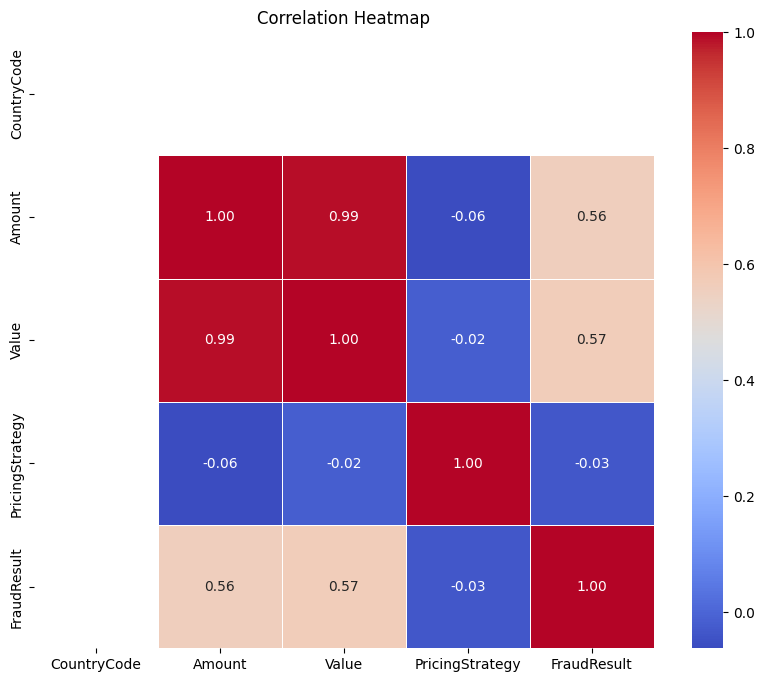

In [6]:
import numpy as np

# Step 7: Correlation Analysis - Understand the relationships between numerical features
# Select only numeric columns from the dataset
numerical_data = data.select_dtypes(include=[np.float64, np.int64])

# Calculate the correlation matrix for numerical features
correlation_matrix = numerical_data.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


In [7]:
# Step 8: Identify Missing Values - Check for missing values in the dataset
missing_values = data.isnull().sum()
print("\nMissing Values:\n", missing_values)


Missing Values:
 TransactionId           0
BatchId                 0
AccountId               0
SubscriptionId          0
CustomerId              0
CurrencyCode            0
CountryCode             0
ProviderId              0
ProductId               0
ProductCategory         0
ChannelId               0
Amount                  0
Value                   0
TransactionStartTime    0
PricingStrategy         0
FraudResult             0
dtype: int64


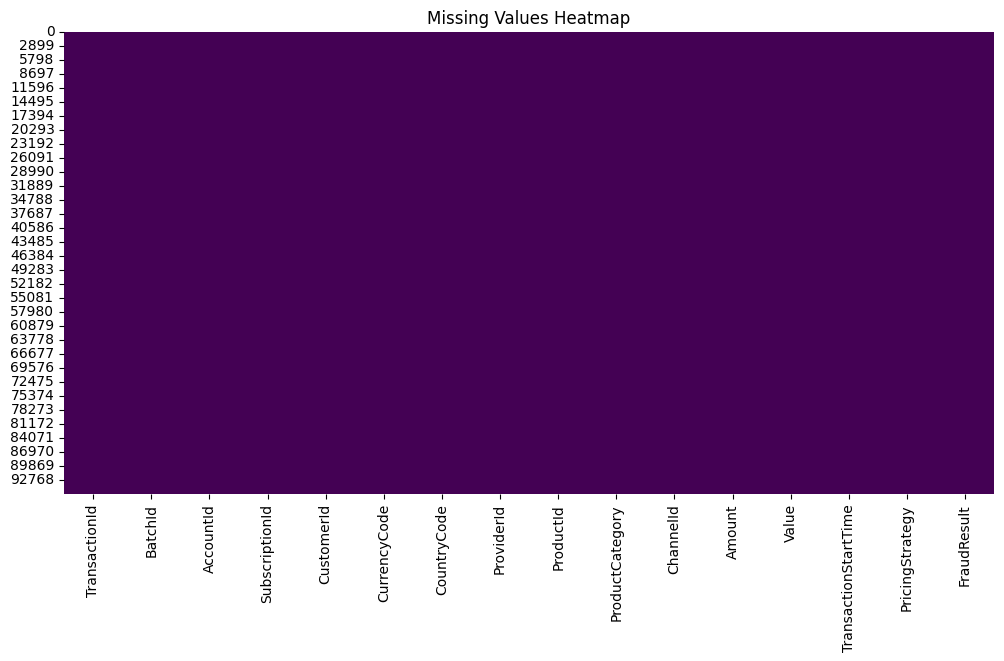

In [8]:
# Visualize missing values using a heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

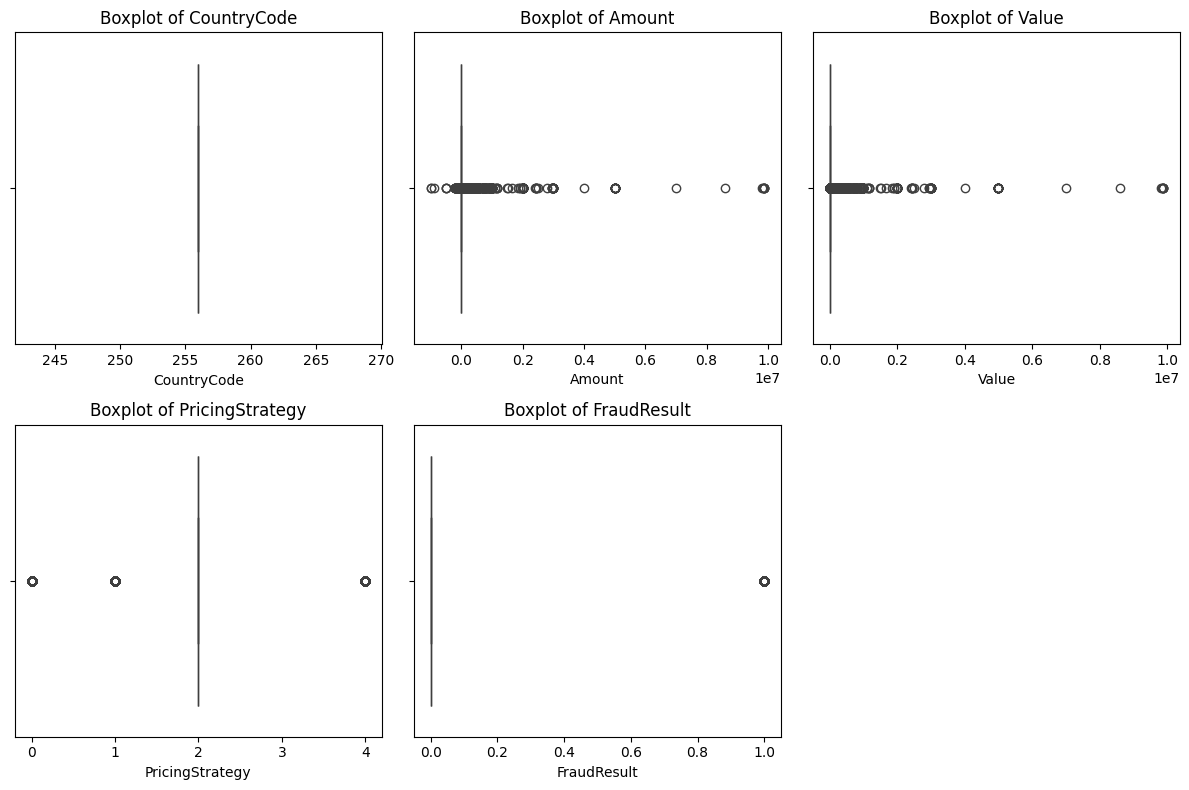

In [10]:
# Step 9: Outlier Detection - Use box plots to identify potential outliers for numerical features
import seaborn as sns # importing the necessary libraries
import matplotlib.pyplot as plt
import pandas as pd

# Load the dataset into the 'data' DataFrame
data = pd.read_csv('/content/drive/MyDrive/extracted_data/data/data.csv')


numerical_features = data.select_dtypes(include=[np.number]).columns # Defining numerical_features before it's used in the loop


plt.figure(figsize=(12, 8))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=data[feature])
    plt.title(f'Boxplot of {feature}')
    plt.tight_layout()

plt.show()

# Task 3 - Feature Engineering

In [27]:
# Step 1: Create Aggregate Features

# Assuming 'CustomerId' is a unique identifier for customers and 'Amount' is the numerical column representing the transaction amount
# You can adjust these column names based on your dataset

# Total Transaction Amount: Sum of all transaction amounts for each customer
total_transaction = data.groupby('CustomerId')['Amount'].sum().reset_index(name='total_transaction_amount')

# Average Transaction Amount: Average transaction amount per customer
average_transaction = data.groupby('CustomerId')['Amount'].mean().reset_index(name='average_transaction_amount')

# Transaction Count: Number of transactions per customer
transaction_count = data.groupby('CustomerId')['Amount'].count().reset_index(name='transaction_count')

# Standard Deviation of Transaction Amounts: Variability of transaction amounts per customer
std_transaction = data.groupby('CustomerId')['Amount'].std().reset_index(name='std_transaction_amount')

# Merge all aggregate features back to the original dataframe
data = data.merge(total_transaction, on='CustomerId', how='left')
data = data.merge(average_transaction, on='CustomerId', how='left')
data = data.merge(transaction_count, on='CustomerId', how='left')
data = data.merge(std_transaction, on='CustomerId', how='left')

# Show the first few rows to confirm the feature creation
print(data.head())

         TransactionId         BatchId       AccountId       SubscriptionId  \
0  TransactionId_76871   BatchId_36123  AccountId_3957   SubscriptionId_887   
1  TransactionId_73770   BatchId_15642  AccountId_4841  SubscriptionId_3829   
2  TransactionId_26203   BatchId_53941  AccountId_4229   SubscriptionId_222   
3    TransactionId_380  BatchId_102363   AccountId_648  SubscriptionId_2185   
4  TransactionId_28195   BatchId_38780  AccountId_4841  SubscriptionId_3829   

        CustomerId  ProductId   Amount  Value  TransactionStartTime  \
0  CustomerId_4406          1   1000.0   1000  2018-11-15T02:18:49Z   
1  CustomerId_4406         19    -20.0     20  2018-11-15T02:19:08Z   
2  CustomerId_4683          0    500.0    500  2018-11-15T02:44:21Z   
3   CustomerId_988         11  20000.0  21800  2018-11-15T03:32:55Z   
4   CustomerId_988         19   -644.0    644  2018-11-15T03:34:21Z   

   ProviderId_ProviderId_2  ...  ProductCategory_movies_True  \
0                    False  ...   

In [29]:
# Step 2: Extract Features from datetime
# Assuming 'TransactionStartTime' is the actual column name in your dataset
# representing the date of the transaction

# Convert 'TransactionStartTime' to datetime if it's not already
data['TransactionStartTime'] = pd.to_datetime(data['TransactionStartTime'], errors='coerce')

data['transaction_hour'] = data['TransactionStartTime'].dt.hour
data['transaction_day'] = data['TransactionStartTime'].dt.day
data['transaction_month'] = data['TransactionStartTime'].dt.month
data['transaction_year'] = data['TransactionStartTime'].dt.year

# Show the first few rows to confirm the new features
print(data.head())

         TransactionId         BatchId       AccountId       SubscriptionId  \
0  TransactionId_76871   BatchId_36123  AccountId_3957   SubscriptionId_887   
1  TransactionId_73770   BatchId_15642  AccountId_4841  SubscriptionId_3829   
2  TransactionId_26203   BatchId_53941  AccountId_4229   SubscriptionId_222   
3    TransactionId_380  BatchId_102363   AccountId_648  SubscriptionId_2185   
4  TransactionId_28195   BatchId_38780  AccountId_4841  SubscriptionId_3829   

        CustomerId  ProductId   Amount  Value      TransactionStartTime  \
0  CustomerId_4406          1   1000.0   1000 2018-11-15 02:18:49+00:00   
1  CustomerId_4406         19    -20.0     20 2018-11-15 02:19:08+00:00   
2  CustomerId_4683          0    500.0    500 2018-11-15 02:44:21+00:00   
3   CustomerId_988         11  20000.0  21800 2018-11-15 03:32:55+00:00   
4   CustomerId_988         19   -644.0    644 2018-11-15 03:34:21+00:00   

   ProviderId_ProviderId_2  ...  ProductCategory_tv_True  \
0             

In [32]:
# Find which categorical columns actually exist in the dataset
categorical_columns = ['ProductCategory', 'ChannelId']  # Adjust based on your dataset
existing_columns = [col for col in categorical_columns if col in data.columns]

# Apply One-Hot Encoding only on existing columns
if existing_columns:
    data = pd.get_dummies(data, columns=existing_columns, drop_first=True)

# Apply Label Encoding if 'ProviderId' exists
if 'ProviderId' in data.columns:
    from sklearn.preprocessing import LabelEncoder
    label_encoder = LabelEncoder()
    data['ProviderId'] = label_encoder.fit_transform(data['ProviderId'])

# Show first few rows
print(data.head())


         TransactionId         BatchId       AccountId       SubscriptionId  \
0  TransactionId_76871   BatchId_36123  AccountId_3957   SubscriptionId_887   
1  TransactionId_73770   BatchId_15642  AccountId_4841  SubscriptionId_3829   
2  TransactionId_26203   BatchId_53941  AccountId_4229   SubscriptionId_222   
3    TransactionId_380  BatchId_102363   AccountId_648  SubscriptionId_2185   
4  TransactionId_28195   BatchId_38780  AccountId_4841  SubscriptionId_3829   

        CustomerId  ProductId   Amount  Value      TransactionStartTime  \
0  CustomerId_4406          1   1000.0   1000 2018-11-15 02:18:49+00:00   
1  CustomerId_4406         19    -20.0     20 2018-11-15 02:19:08+00:00   
2  CustomerId_4683          0    500.0    500 2018-11-15 02:44:21+00:00   
3   CustomerId_988         11  20000.0  21800 2018-11-15 03:32:55+00:00   
4   CustomerId_988         19   -644.0    644 2018-11-15 03:34:21+00:00   

   ProviderId_ProviderId_2  ...  ProductCategory_tv_True  \
0             

In [34]:
# Check for missing values
missing_values = data.isnull().sum()
print("Missing values before handling:\n", missing_values)

# Impute missing values only for columns that exist
if 'transaction_amount' in data.columns:
    data['transaction_amount'].fillna(data['transaction_amount'].mean(), inplace=True)

if 'category_column1' in data.columns:
    data['category_column1'].fillna(data['category_column1'].mode()[0], inplace=True)

# Remove rows with missing values if necessary
data.dropna(axis=0, inplace=True)  # Drop rows with any missing values

# Check missing values after handling
missing_values_after = data.isnull().sum()
print("Missing values after handling:\n", missing_values_after)


Missing values before handling:
 TransactionId                                0
BatchId                                      0
AccountId                                    0
SubscriptionId                               0
CustomerId                                   0
ProductId                                    0
Amount                                       0
Value                                        0
TransactionStartTime                         0
ProviderId_ProviderId_2                      0
ProviderId_ProviderId_3                      0
ProviderId_ProviderId_4                      0
ProviderId_ProviderId_5                      0
ProviderId_ProviderId_6                      0
ChannelId_ChannelId_2                        0
ChannelId_ChannelId_3                        0
ChannelId_ChannelId_5                        0
PricingStrategy_1                            0
PricingStrategy_2                            0
PricingStrategy_4                            0
FraudResult_1              

In [36]:
from sklearn.preprocessing import StandardScaler

# Select only numerical columns
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns

# Apply Standardization
scaler = StandardScaler()
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

print("Standardized Data Sample:\n", data.head())


Standardized Data Sample:
          TransactionId         BatchId       AccountId       SubscriptionId  \
0  TransactionId_76871   BatchId_36123  AccountId_3957   SubscriptionId_887   
1  TransactionId_73770   BatchId_15642  AccountId_4841  SubscriptionId_3829   
2  TransactionId_26203   BatchId_53941  AccountId_4229   SubscriptionId_222   
3    TransactionId_380  BatchId_102363   AccountId_648  SubscriptionId_2185   
4  TransactionId_28195   BatchId_38780  AccountId_4841  SubscriptionId_3829   

        CustomerId CurrencyCode  CountryCode    ProviderId     ProductId  \
0  CustomerId_4406          UGX          0.0  ProviderId_6  ProductId_10   
1  CustomerId_4406          UGX          0.0  ProviderId_4   ProductId_6   
2  CustomerId_4683          UGX          0.0  ProviderId_6   ProductId_1   
3   CustomerId_988          UGX          0.0  ProviderId_1  ProductId_21   
4   CustomerId_988          UGX          0.0  ProviderId_4   ProductId_6   

      ProductCategory    ChannelId    Amo

# Task 4 - Default estimator and WoE binning

In [38]:
print(data.columns)


Index(['TransactionId', 'BatchId', 'AccountId', 'SubscriptionId', 'CustomerId',
       'CurrencyCode', 'CountryCode', 'ProviderId', 'ProductId',
       'ProductCategory', 'ChannelId', 'Amount', 'Value',
       'TransactionStartTime', 'PricingStrategy', 'FraudResult'],
      dtype='object')


In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

# Load Data (Assuming 'data' is already loaded)
data['TransactionStartTime'] = pd.to_datetime(data['TransactionStartTime'])  # Ensure datetime format

# Compute RFMS metrics
rfms = data.groupby('CustomerId').agg({
    'TransactionStartTime': lambda x: (data['TransactionStartTime'].max() - x.max()).days,  # Recency
    'CustomerId': 'count',  # Frequency
    'Amount': ['sum', 'mean']  # Monetary (total and average)
}).reset_index()

# Rename columns for clarity
rfms.columns = ['CustomerId', 'recency', 'frequency', 'monetary_total', 'monetary_avg']

# Normalize RFMS Features
scaler = MinMaxScaler()
rfms[['recency', 'frequency', 'monetary_total', 'monetary_avg']] = scaler.fit_transform(rfms[['recency', 'frequency', 'monetary_total', 'monetary_avg']])

print(rfms.head())


        CustomerId   recency  frequency  monetary_total  monetary_avg
0     CustomerId_1  0.922222   0.000000        0.615480      0.045974
1    CustomerId_10  0.922222   0.000000        0.615480      0.045974
2  CustomerId_1001  0.988889   0.000978        0.615495      0.047525
3  CustomerId_1002  0.277778   0.002445        0.615234      0.047124
4  CustomerId_1003  0.122222   0.001222        0.615463      0.047451


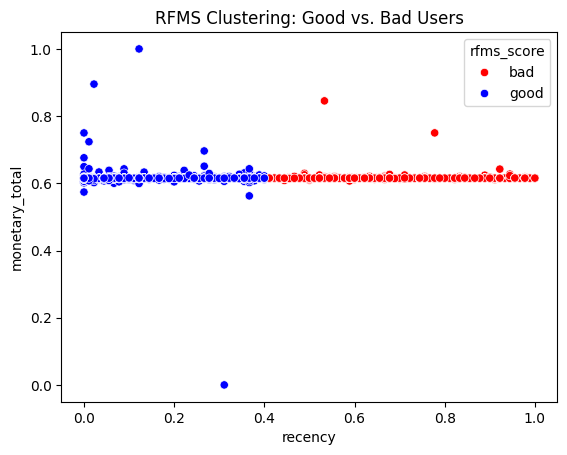

rfms_score
good    2333
bad     1409
Name: count, dtype: int64


In [41]:
# Apply K-Means clustering for classification
kmeans = KMeans(n_clusters=2, random_state=42)
rfms['rfms_cluster'] = kmeans.fit_predict(rfms[['recency', 'frequency', 'monetary_total', 'monetary_avg']])

# Assign Good/Bad Labels
rfms['rfms_score'] = rfms['rfms_cluster'].map({0: 'bad', 1: 'good'})  # Adjust based on distribution

# Visualize Clusters
sns.scatterplot(data=rfms, x='recency', y='monetary_total', hue='rfms_score', palette=['red', 'blue'])
plt.title("RFMS Clustering: Good vs. Bad Users")
plt.show()

# Check distribution
print(rfms['rfms_score'].value_counts())


In [44]:
import numpy as np
import pandas as pd

# Function to calculate WoE
def calculate_woe(df, feature, target):
    df = df[[feature, target]].copy()

    # Create bins using quantiles, removing 'observed' argument for compatibility
    df['bin'] = pd.qcut(df[feature], q=5, duplicates='drop')

    # Compute WoE
    grouped = df.groupby('bin')[target].agg(['count', 'sum'])
    grouped['good'] = grouped['count'] - grouped['sum']

    # Avoid division by zero and handle NaN
    grouped['good'] = grouped['good'].replace(0, 0.5)
    grouped['sum'] = grouped['sum'].replace(0, 0.5)

    grouped['woe'] = np.log((grouped['good'] / grouped['good'].sum()) / (grouped['sum'] / grouped['sum'].sum()))

    # Replace NaN values in WoE with 0 (or another strategy)
    grouped['woe'] = grouped['woe'].fillna(0)

    return grouped[['woe']]

# Apply WoE binning
features = ['recency', 'frequency', 'monetary_total', 'monetary_avg']
woe_dict = {}

for feature in features:
    woe_dict[feature] = calculate_woe(rfms, feature, 'default')

# Replace raw feature values with WoE values
for feature, woe_df in woe_dict.items():
    rfms = rfms.merge(woe_df, left_on=feature, right_index=True, how='left')
    rfms.rename(columns={'woe': f'woe_{feature}'}, inplace=True)

# Keep only WoE features for modeling
rfms_woe = rfms[['CustomerId', 'woe_recency', 'woe_frequency', 'woe_monetary_total', 'woe_monetary_avg', 'default']]

# Check the result
print(rfms_woe.head())

        CustomerId  woe_recency  woe_recency  woe_frequency  woe_frequency  \
0     CustomerId_1          NaN          NaN            NaN            NaN   
1    CustomerId_10          NaN          NaN            NaN            NaN   
2  CustomerId_1001          NaN          NaN            NaN            NaN   
3  CustomerId_1002          NaN          NaN            NaN            NaN   
4  CustomerId_1003          NaN          NaN            NaN            NaN   

   woe_monetary_total  woe_monetary_total  woe_monetary_avg  woe_monetary_avg  \
0                 NaN                 NaN               NaN               NaN   
1                 NaN                 NaN               NaN               NaN   
2                 NaN                 NaN               NaN               NaN   
3                 NaN                 NaN               NaN               NaN   
4                 NaN                 NaN               NaN               NaN   

   default  
0        1  
1        1  
2    

<ipython-input-44-4474d27fba82>:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby('bin')[target].agg(['count', 'sum'])
<ipython-input-44-4474d27fba82>:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby('bin')[target].agg(['count', 'sum'])
<ipython-input-44-4474d27fba82>:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby('bin')[target].agg(['count', 'sum'])
<ipy

# Task 5 - Modelling

In [46]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline

# Step 1: Handle Missing Values (Imputation)
imputer = SimpleImputer(strategy='mean')  # You can also use 'median' or other strategies


In [47]:
# Step 2: Models with Imputation Pipeline
log_reg_pipeline = make_pipeline(imputer, LogisticRegression(random_state=42))
decision_tree_pipeline = make_pipeline(imputer, DecisionTreeClassifier(random_state=42))
random_forest_pipeline = make_pipeline(imputer, RandomForestClassifier(random_state=42))
gbm_pipeline = make_pipeline(imputer, GradientBoostingClassifier(random_state=42))


In [50]:
print(X_train.shape)  # Check dimensions
print(X_train.columns) # Check columns present

(2993, 8)
Index(['woe_recency', 'woe_recency', 'woe_frequency', 'woe_frequency',
       'woe_monetary_total', 'woe_monetary_total', 'woe_monetary_avg',
       'woe_monetary_avg'],
      dtype='object')


In [52]:
# Remove duplicate columns
X_train = X_train.loc[:, ~X_train.columns.duplicated()]

# Check dimensions after removing duplicates
print(X_train.shape)


(2993, 4)


In [54]:
# Check columns with missing values
missing_values = X_train.isnull().sum()
print(missing_values[missing_values > 0])


woe_recency           2993
woe_frequency         2993
woe_monetary_total    2993
woe_monetary_avg      2993
dtype: int64


In [58]:
# Check the number of missing values in the original data
missing_values_original = X.isnull().sum()
print(missing_values_original[missing_values_original > 0])

# Also check for any valid non-null data
valid_columns = X.columns[X.notnull().any()]
print(valid_columns)


woe_recency           3742
woe_recency           3742
woe_frequency         3742
woe_frequency         3742
woe_monetary_total    3742
woe_monetary_total    3742
woe_monetary_avg      3742
woe_monetary_avg      3742
dtype: int64
Index([], dtype='object')


In [59]:
# Remove duplicate columns
X_cleaned = X.loc[:, ~X.columns.duplicated()]

# Check the shape after removing duplicates
print(X_cleaned.shape)


(3742, 4)


In [60]:
# Check the missing values after removing duplicates
missing_values_cleaned = X_cleaned.isnull().sum()
print(missing_values_cleaned[missing_values_cleaned > 0])


woe_recency           3742
woe_frequency         3742
woe_monetary_total    3742
woe_monetary_avg      3742
dtype: int64


In [61]:
# Step 6: Now you can proceed to train the models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import Pipeline

# Create the models
log_reg = LogisticRegression(max_iter=1000)
decision_tree = DecisionTreeClassifier()
random_forest = RandomForestClassifier()
gbm = GradientBoostingClassifier()


In [62]:
# Create a pipeline with imputation and classifier for each model
log_reg_pipeline = Pipeline(steps=[('imputer', imputer), ('classifier', log_reg)])
decision_tree_pipeline = Pipeline(steps=[('imputer', imputer), ('classifier', decision_tree)])
random_forest_pipeline = Pipeline(steps=[('imputer', imputer), ('classifier', random_forest)])
gbm_pipeline = Pipeline(steps=[('imputer', imputer), ('classifier', gbm)])


In [ ]:
# Drop non-relevant columns (e.g., 'TransactionId', 'BatchId', etc.)
X = X.drop(['TransactionId', 'BatchId', 'AccountId'], axis=1)

# Reapply one-hot encoding
X_encoded = pd.get_dummies(X, drop_first=True)


In [ ]:
print(f"Logistic Regression Accuracy: {log_reg_score}")
print(f"Decision Tree Accuracy: {decision_tree_score}")
print(f"Random Forest Accuracy: {random_forest_score}")
print(f"Gradient Boosting Accuracy: {gbm_score}")